In [2]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [77]:
#df.info()
test1 = df.copy()
test2 = test1.groupby("koi_disposition")
test2.mean().T

koi_disposition,CANDIDATE,CONFIRMED,FALSE POSITIVE
koi_fpflag_nt,0.000000,0.009444,0.308505
koi_fpflag_ss,0.013041,0.011667,0.476027
koi_fpflag_co,0.000000,0.003333,0.403253
koi_fpflag_ec,0.000000,0.000556,0.249144
koi_period,67.335777,26.451343,66.103066
koi_period_err1,0.002160,0.000190,0.002556
koi_period_err2,-0.002160,-0.000190,-0.002556
koi_time0bk,169.812894,156.532602,166.012645
koi_time0bk_err1,0.013236,0.004084,0.010165
koi_time0bk_err2,-0.013236,-0.004084,-0.010165


In [78]:
test2.std().T

koi_disposition,CANDIDATE,CONFIRMED,FALSE POSITIVE
koi_fpflag_nt,0.000000,0.096749,0.461942
koi_fpflag_ss,0.113483,0.107410,0.499496
koi_fpflag_co,0.000000,0.057655,0.490621
koi_fpflag_ec,0.000000,0.023570,0.432579
koi_period,121.883514,53.171021,135.529433
koi_period_err1,0.006871,0.000644,0.008838
koi_period_err2,0.006871,0.000644,0.008838
koi_time0bk,75.006909,40.809356,73.153031
koi_time0bk_err1,0.028777,0.006683,0.022828
koi_time0bk_err2,0.028777,0.006683,0.022828


In [5]:
testing = df.drop("koi_disposition", axis=1)
testing = (testing - testing.min()) / (testing.max() - testing.min())
testing.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0.0,0.0,0.0,0.0,0.050570,0.001581,0.998419,0.031063,0.006171,0.993829,...,0.953260,0.831296,0.043478,0.904667,0.004547,0.004045,0.999412,0.552405,0.733837,0.692702
1,0.0,1.0,0.0,0.0,0.018338,0.000095,0.999905,0.040928,0.001006,0.998994,...,0.898442,0.845778,0.029891,0.825223,0.004219,0.008977,0.999249,0.784312,0.733360,0.700058
2,0.0,1.0,0.0,0.0,0.001379,0.000002,0.999998,0.036828,0.000187,0.999813,...,0.899596,0.849539,0.036005,0.833168,0.003791,0.007744,0.999355,0.259712,0.742947,0.713365
3,0.0,0.0,0.0,0.0,0.002116,0.000024,0.999976,0.037781,0.001971,0.998029,...,0.878246,0.825842,0.047554,0.791460,0.005208,0.012868,0.998719,0.406994,0.739203,0.706091
4,0.0,0.0,0.0,0.0,0.003618,0.000067,0.999933,0.038804,0.003324,0.996676,...,0.866128,0.834869,0.036685,0.772592,0.004797,0.012136,0.998989,0.751443,0.739105,0.723035


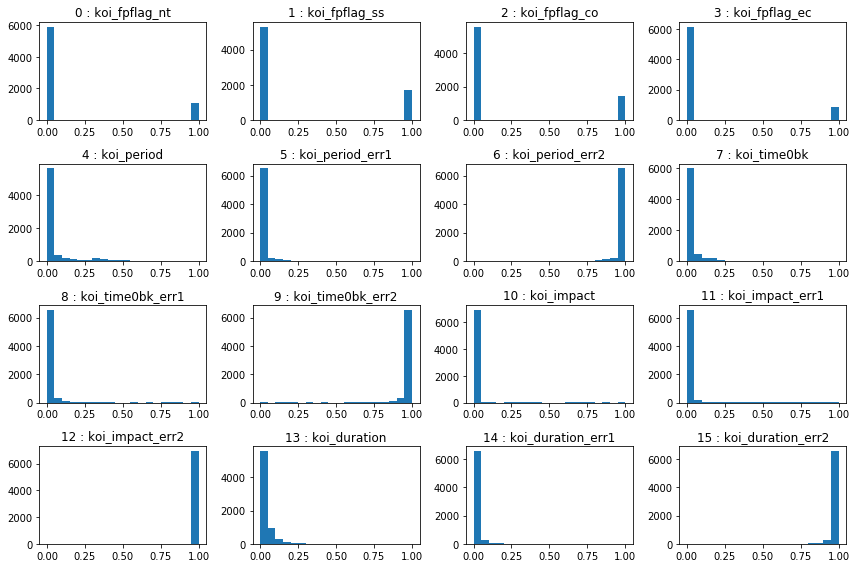

In [13]:
# Plot histogram of each independent variable
j = 0 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(16):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_0_15.png")
plt.show()

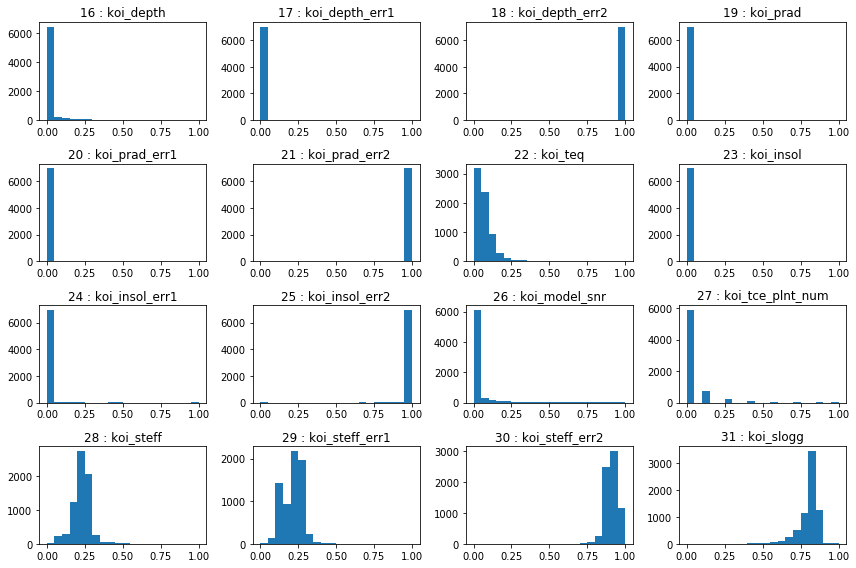

In [16]:
# Plot histogram of each independent variable
j = 16 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(16):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_16_31.png")
plt.show()

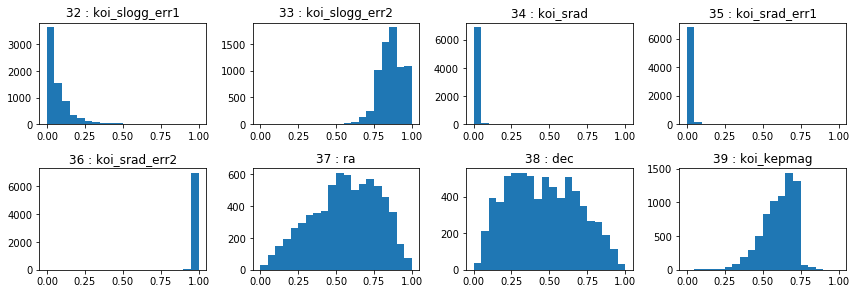

In [18]:
# Plot histogram of each independent variable
j = 32 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(8):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    
    plt.title(str(j) + " : " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/feature_hist_32_40.png")
plt.show()

# Select your features (columns)

In [49]:
# Set features. This will also be used as your x values.
selected_features = df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",
                        "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", 
                        "koi_prad", "koi_teq", "koi_insol", "koi_model_snr", "koi_tce_plnt_num", 
                        "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]
print(selected_features.head())
X = np.array(selected_features)
X[:5]

   koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0   54.418383   
1              0              1              0              0   19.899140   
2              0              1              0              0    1.736952   
3              0              0              0              0    2.525592   
4              0              0              0              0    4.134435   

   koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  koi_teq  \
0   162.513840       0.586       4.50700      874.8      2.83      443   
1   175.850252       0.969       1.78220    10829.0     14.60      638   
2   170.307565       1.276       2.40641     8079.2     33.46     1395   
3   171.595550       0.701       1.65450      603.3      2.75     1406   
4   172.979370       0.762       3.14020      686.0      2.77     1160   

   koi_insol  koi_model_snr  koi_tce_plnt_num  koi_steff  koi_slogg  koi_srad  \
0       9.1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.44183827e+01, 1.62513840e+02, 5.86000000e-01, 4.50700000e+00,
        8.74800000e+02, 2.83000000e+00, 4.43000000e+02, 9.11000000e+00,
        2.58000000e+01, 2.00000000e+00, 5.45500000e+03, 4.46700000e+00,
        9.27000000e-01, 2.91934230e+02, 4.81416510e+01, 1.53470000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.98991399e+01, 1.75850252e+02, 9.69000000e-01, 1.78220000e+00,
        1.08290000e+04, 1.46000000e+01, 6.38000000e+02, 3.93000000e+01,
        7.63000000e+01, 1.00000000e+00, 5.85300000e+03, 4.54400000e+00,
        8.68000000e-01, 2.97004820e+02, 4.81341290e+01, 1.54360000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.73695245e+00, 1.70307565e+02, 1.27600000e+00, 2.40641000e+00,
        8.07920000e+03, 3.34600000e+01, 1.39500000e+03, 8.91960000e+02,
        5.05600000e+02, 1.00000000e+00, 5.80500000e+03, 4.5640

In [50]:
y = df["koi_disposition"]
print(y.head())
y.shape

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object


(6991,)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(encoded_y[:5])
from keras.utils import to_categorical
one_hot_y = to_categorical(encoded_y)
one_hot_y[:5]

[1 2 2 1 1]


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=1)

In [53]:
X_train[:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.05484133e+01, 1.39064020e+02, 1.01700000e+00, 1.87200000e+00,
        1.02900000e+02, 3.89000000e+00, 8.99000000e+02, 1.54840000e+02,
        1.17000000e+01, 2.00000000e+00, 6.04700000e+03, 4.38700000e+00,
        1.09200000e+00, 2.98095430e+02, 4.47370610e+01, 1.32040000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.47543849e+01, 1.40207320e+02, 7.09000000e-01, 3.39000000e+00,
        5.93300000e+02, 2.10000000e+00, 4.91000000e+02, 1.37000000e+01,
        1.80000000e+01, 1.00000000e+00, 4.85200000e+03, 4.51900000e+00,
        8.04000000e-01, 2.95735350e+02, 4.25762480e+01, 1.55140000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.05733568e+00, 1.31792007e+02, 2.62000000e-01, 1.57950000e+00,
        4.73370000e+04, 1.45900000e+01, 1.27600000e+03, 6.23510000e+02,
        4.76000000e+02, 1.00000000e+00, 4.66400000e+03, 4.5940

In [54]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)
X_train_scaled[:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.56989489e-03, 1.36824641e-02, 1.00886852e-02, 1.43641964e-02,
        6.18920878e-05, 1.87176316e-05, 5.53687822e-02, 1.41419711e-05,
        1.11563995e-03, 1.42857143e-01, 3.89374425e-01, 8.16249765e-01,
        5.46402526e-03, 8.34972972e-01, 5.17791237e-01, 5.15579800e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.28349382e-02, 1.45281274e-02, 7.03331151e-03, 2.73016890e-02,
        3.80045965e-04, 9.78308212e-06, 2.73756432e-02, 1.24959414e-06,
        1.81153417e-03, 0.00000000e+00, 2.51954922e-01, 8.41075795e-01,
        3.86317147e-03, 7.26931676e-01, 3.80671885e-01, 7.06504670e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.07456000e-04, 8.30358269e-03, 2.59905164e-03, 1.18713001e-02,
        3.07056768e-02, 7.21252738e-05, 8.12349914e-02, 5.69524453e-05,
        5.24019397e-02, 0.00000000e+00, 2.30335787e-01, 8.5518

# Train the Model



In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=40, activation='relu', input_dim=X_train_scaled.shape[1]))
#model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 63        
Total params: 1,723
Trainable params: 1,723
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(X_train_scaled, y_train, epochs=100, shuffle=True, verbose=2)

Train on 5243 samples
Epoch 1/100
5243/5243 - 1s - loss: 0.7075 - accuracy: 0.6672
Epoch 2/100
5243/5243 - 0s - loss: 0.4157 - accuracy: 0.7816
Epoch 3/100
5243/5243 - 0s - loss: 0.3941 - accuracy: 0.7856
Epoch 4/100
5243/5243 - 0s - loss: 0.3866 - accuracy: 0.7946
Epoch 5/100
5243/5243 - 0s - loss: 0.3809 - accuracy: 0.7929
Epoch 6/100
5243/5243 - 0s - loss: 0.3780 - accuracy: 0.7978
Epoch 7/100
5243/5243 - 0s - loss: 0.3754 - accuracy: 0.7986
Epoch 8/100
5243/5243 - 0s - loss: 0.3733 - accuracy: 0.8022
Epoch 9/100
5243/5243 - 0s - loss: 0.3714 - accuracy: 0.8024
Epoch 10/100
5243/5243 - 0s - loss: 0.3701 - accuracy: 0.8007
Epoch 11/100
5243/5243 - 0s - loss: 0.3675 - accuracy: 0.8032
Epoch 12/100
5243/5243 - 0s - loss: 0.3651 - accuracy: 0.8089
Epoch 13/100
5243/5243 - 0s - loss: 0.3633 - accuracy: 0.8127
Epoch 14/100
5243/5243 - 0s - loss: 0.3630 - accuracy: 0.8148
Epoch 15/100
5243/5243 - 0s - loss: 0.3626 - accuracy: 0.8089
Epoch 16/100
5243/5243 - 0s - loss: 0.3604 - accuracy: 0.

In [66]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.28048104661954354, Accuracy: 0.8651535511016846
Normal Neural Network - Loss: 0.2995521529861119, Accuracy: 0.8678489923477173


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [51]:
# if joblib fails to import, try running the command to install in terminal/git-bash
#import joblib
#filename = 'your_name.sav'
#joblib.dump(your_model, filename)